In [18]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Load and Preview the Dataset

# Load dataset (original file has no header)
df = pd.read_csv(r"C:\Users\bruna\heart-disease-ml-project\Data\heart.csv.data", header=None)

# Assign proper column names
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Preview first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [20]:
#Clean and Prepare the Data

# Check for missing values
print(df.isnull().sum())

# Replace all '?' strings with actual NaN
df.replace("?", np.nan, inplace=True)

# Convert all columns (or selected ones) to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop remaining missing rows
df.dropna(inplace=True)

#Fill any residual NaN with column means
df.fillna(df.mean(), inplace=True)

# Inspect value types
df.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Diagnosis class counts:
target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


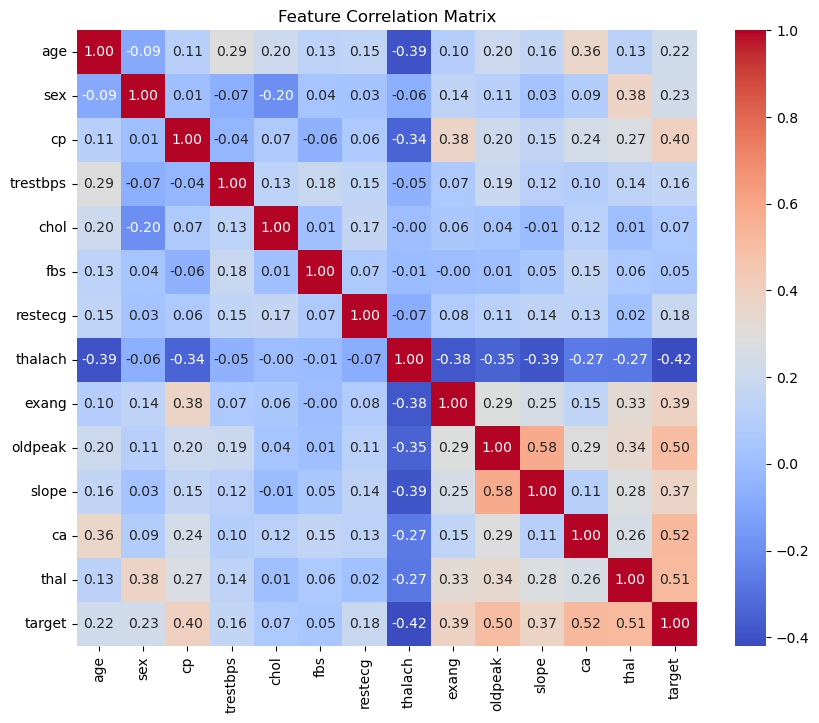

In [21]:
# Overview: Summary statistics and feature correlations

# Show summary statistics for all features
display(df.describe())

# Show diagnosis class distribution
print("Diagnosis class counts:")
print(df['target'].value_counts())

# Show correlation matrix (to see which features relate to diagnosis)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

### Dataset Overview

This section provides a quick summary of the heart disease dataset to help guide further analysis:

- **Summary statistics**: Displays the mean, standard deviation, and range for each clinical feature, allowing you to spot outliers and understand typical patient values.
- **Diagnosis class distribution**: Shows how many patients fall into each diagnosis category, highlighting any class imbalance that may affect modeling.
- **Feature correlation matrix**: Visualizes the relationships between features and the diagnosis label. Strong correlations can indicate which variables are most relevant for prediction and worth exploring in more detail.

## Reviewing these insights helps you choose which features to focus on for deeper exploratory analysis and modeling.

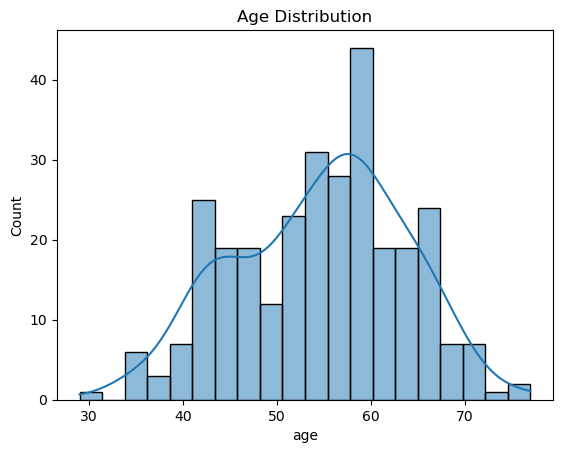

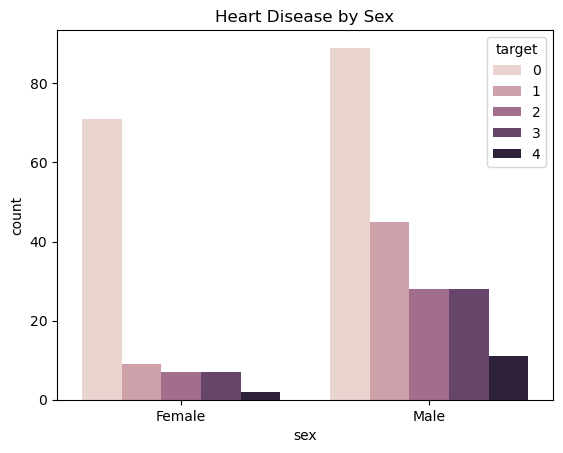

In [22]:
#Exploratory Data Analysis (EDA)

# Age distribution
sns.histplot(data=df, x="age", bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Sex vs disease presence
sns.countplot(data=df, x="sex", hue="target")
plt.title("Heart Disease by Sex")
plt.xticks([0, 1], ["Female", "Male"])
plt.show()


 This plot shows the age range of patients, with a smooth density curve overlay. Most patients fall between 45 and 65 years — highlighting the core demographic impacted by heart-related issues.
# This grouped bar chart reveals how heart disease severity (target 0–4) is distributed between male and female patients:
#- Females: Most cases are concentrated in target 0, indicating a larger proportion of women without heart disease.
#- Males: The distribution is more varied — with a significant number of cases in targets 1, 2, 3, and 4, suggesting higher disease presence.
# This contrast might hint at sex-linked clinical or lifestyle risk factors, setting the stage for feature-specific modeling


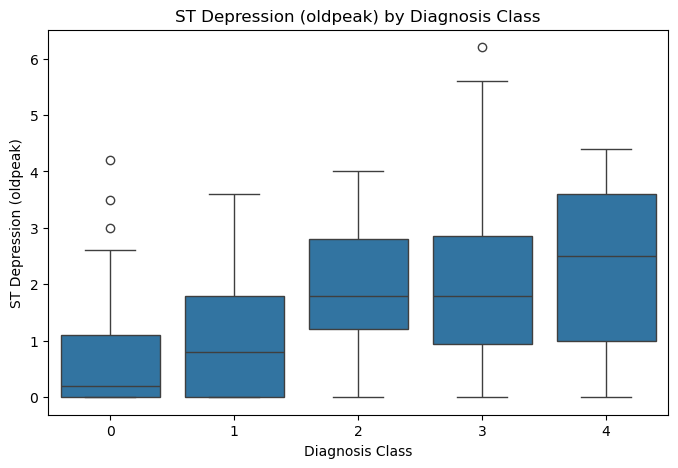

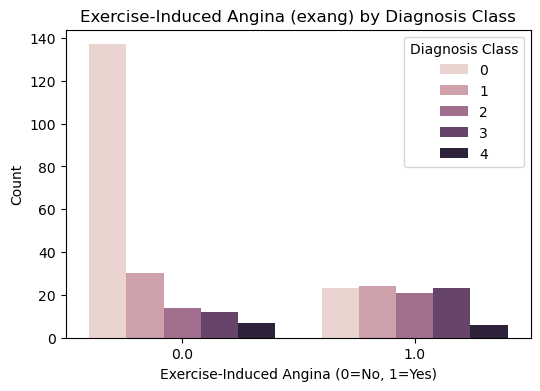

In [23]:
# EDA: Oldpeak and Exercise-Induced Angina (exang)

# Boxplot: ST depression ('oldpeak') by diagnosis class
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="oldpeak", data=df)
plt.title("ST Depression (oldpeak) by Diagnosis Class")
plt.xlabel("Diagnosis Class")
plt.ylabel("ST Depression (oldpeak)")
plt.show()

# Countplot: Exercise-induced angina ('exang') by diagnosis class
plt.figure(figsize=(6,4))
sns.countplot(x="exang", hue="target", data=df)
plt.title("Exercise-Induced Angina (exang) by Diagnosis Class")
plt.xlabel("Exercise-Induced Angina (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Diagnosis Class")

### Exploring ST Depression (oldpeak) and Exercise-Induced Angina (exang)

These visualizations help us understand two important clinical features:

- **ST Depression (oldpeak):** The boxplot shows how the degree of ST depression (measured during exercise) varies across diagnosis classes. Higher values of oldpeak may be associated with more severe heart disease, and the spread within each class can reveal potential outliers or trends.

- **Exercise-Induced Angina (exang):** The countplot displays the distribution of patients with and without exercise-induced angina, grouped by diagnosis class. This helps identify whether angina during exercise is more common in certain diagnosis levels.

## Together, these plots highlight how these features relate to heart disease severity and can guide feature selection for predictive modeling.

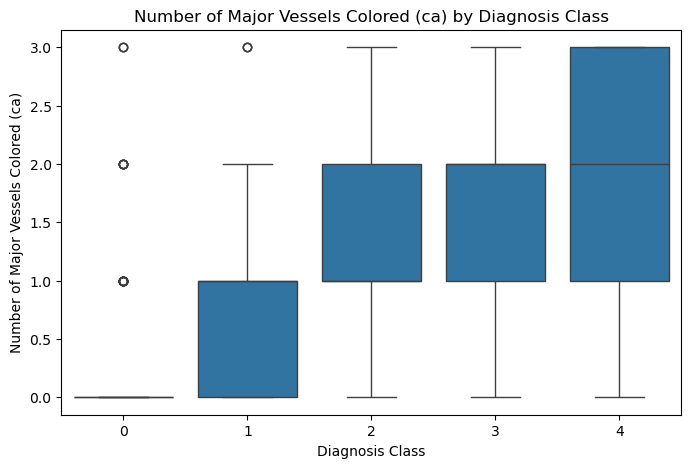

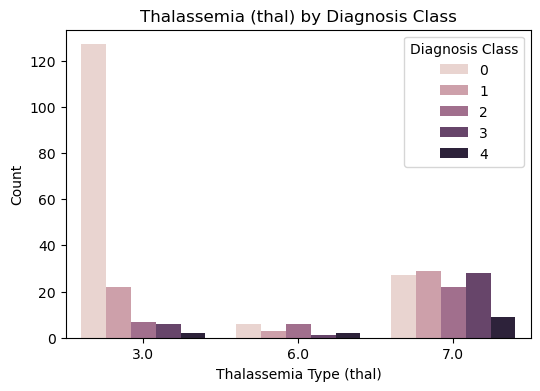

In [24]:
# EDA: Number of Major Vessels Colored (ca) and Thalassemia (thal)

# Boxplot: Number of major vessels colored ('ca') by diagnosis class
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="ca", data=df)
plt.title("Number of Major Vessels Colored (ca) by Diagnosis Class")
plt.xlabel("Diagnosis Class")
plt.ylabel("Number of Major Vessels Colored (ca)")
plt.show()

# Countplot: Thalassemia ('thal') by diagnosis class
plt.figure(figsize=(6,4))
sns.countplot(x="thal", hue="target", data=df)
plt.title("Thalassemia (thal) by Diagnosis Class")
plt.xlabel("Thalassemia Type (thal)")
plt.ylabel("Count")
plt.legend(title="Diagnosis Class")
plt.show()

### Exploring Number of Major Vessels Colored (ca) and Thalassemia (thal)

These plots provide insight into two additional clinical features:

- **Number of Major Vessels Colored (ca):** The boxplot shows how the number of major vessels colored by fluoroscopy varies across diagnosis classes. Higher values of 'ca' may be linked to more severe heart disease, and the distribution within each class can reveal trends or outliers.

- **Thalassemia (thal):** The countplot displays the distribution of thalassemia types among patients, grouped by diagnosis class. This helps identify if certain thalassemia types are more common in specific diagnosis levels.

## Analyzing these features helps uncover their relationship to heart disease severity and supports feature selection for predictive modeling.

In [25]:
#Prepare Data for Modeling

from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 237
Testing samples: 60


In [26]:
#Train and Evaluate the Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:", classification_report(y_test, y_pred))

 Accuracy: 0.6
 Classification Report:               precision    recall  f1-score   support

           0       0.76      0.97      0.85        36
           1       0.00      0.00      0.00         9
           2       0.20      0.20      0.20         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.19      0.23      0.21        60
weighted avg       0.47      0.60      0.53        60



In [27]:
#Handle Class Imbalance with SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# Convert target to binary: 0 = healthy, 1 = any heart disease
df["target_binary"] = df["target"].apply(lambda x: 0 if x == 0 else 1)

# Separate features and new binary target
X = df.drop(["target", "target_binary"], axis=1)
y = df["target_binary"]

# Check original class distribution
print("Before SMOTE:", Counter(y))

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check post-SMOTE distribution
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 160, 1: 137})
After SMOTE: Counter({0: 160, 1: 160})


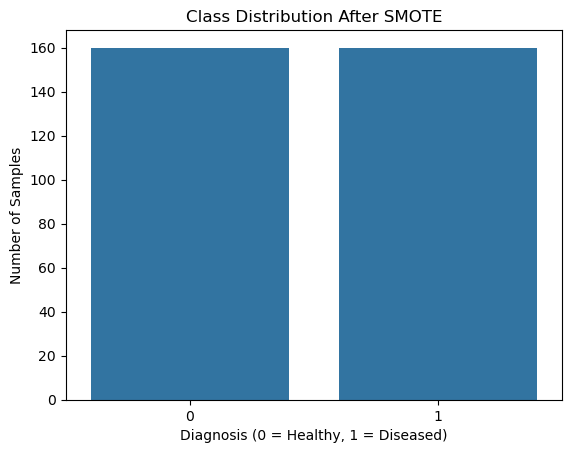

In [28]:
#Visualize Balanced Classes

sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Diagnosis (0 = Healthy, 1 = Diseased)")
plt.ylabel("Number of Samples")
plt.show()

### This chart confirms that the binary classification labels are now perfectly balanced — an equal number of healthy and diseased samples.

In [29]:
# Use only 'age' as the input feature
X = df[["age"]]
y = df["target"]  # Multi-class diagnosis labels: 0–4

# Balance classes using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split balanced data for training/testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate performance
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.4
Classification Report:               precision    recall  f1-score   support

           0       0.48      0.47      0.47        30
           1       0.44      0.33      0.38        36
           2       0.28      0.40      0.33        25
           3       0.36      0.45      0.40        33
           4       0.50      0.36      0.42        36

    accuracy                           0.40       160
   macro avg       0.41      0.40      0.40       160
weighted avg       0.42      0.40      0.40       160



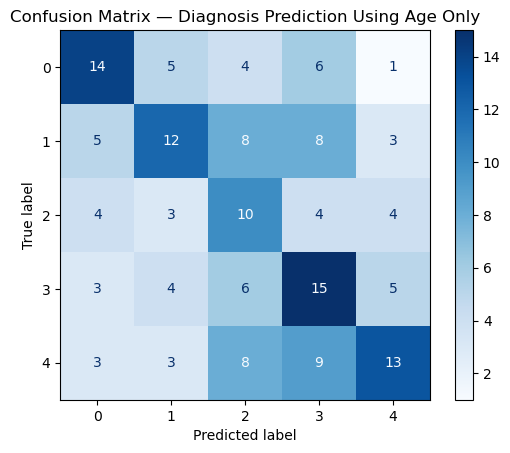

In [30]:
#Visualize Prediction Results

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", colorbar=True)
plt.title("Confusion Matrix — Diagnosis Prediction Using Age Only")
plt.show()


### Confusion Matrix: Predicting Diagnosis Using Age Feature Only

This matrix evaluates how well a Random Forest model predicts heart disease diagnosis levels (0–4) using only the patient's age.

## Observations:
- Some predictive power exists — especially for more severe diagnoses (3 and 4), where age likely plays a stronger role.
- The model struggles to differentiate between adjacent diagnosis classes, as age alone does not offer enough signal.
- This reinforces the need for multidimensional clinical data (e.g., cholesterol, heart rate, chest pain type) to improve diagnostic precision.

## While single-feature modeling is helpful for testing hypotheses, it’s not sufficient for building clinical-grade tools.


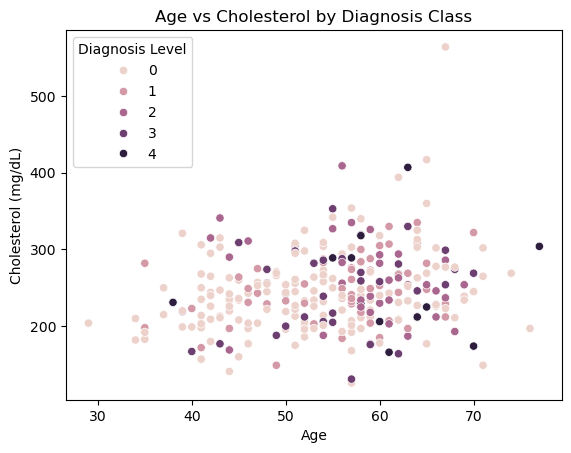

In [31]:
#Visualize Age vs Cholesterol by Diagnosis

# Select age and cholesterol as features
X = df[["age", "chol"]]

# Convert diagnosis to binary: 0 = healthy, 1 = diseased
df["target_binary"] = df["target"].apply(lambda x: 0 if x == 0 else 1)

# Scatter plot of age vs cholesterol, colored by diagnosis level
sns.scatterplot(x="age", y="chol", hue="target", data=df)
plt.title("Age vs Cholesterol by Diagnosis Class")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dL)")
plt.legend(title="Diagnosis Level")
plt.show()

### Age vs Cholesterol by Diagnosis Class

This scatter plot visualizes the relationship between patient "age" and "cholesterol levels", colored by heart disease "diagnosis class" (0 = healthy, 1–4 = increasing severity).

## Observations:
- Patients are widely distributed across all diagnosis levels with no sharp visual boundaries.
- Higher cholesterol levels (above 300 mg/dL) appear across all age groups, including among healthy individuals.
- There's no obvious clustering between age and diagnosis, suggesting that these two features alone do not offer strong discriminative power.

## This supports earlier findings: heart disease prediction requires combining multiple clinical variables — age and cholesterol contribute to the picture, but they're not enough to distinguish outcomes on their own.

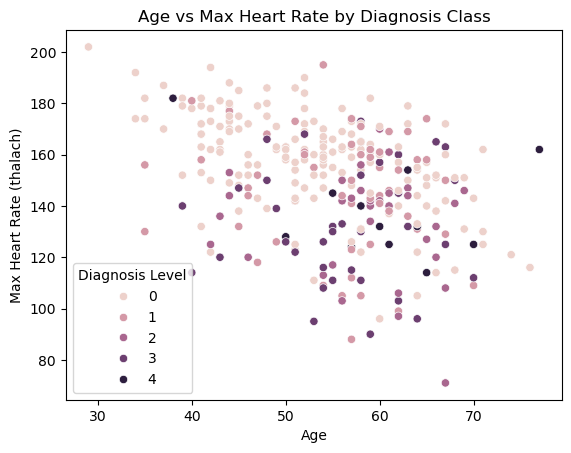

In [32]:
#Age vs Max Heart Rate by Diagnosis Class

# Select relevant features
X = df[["age", "thalach"]]  # 'thalach' is max heart rate

# Convert diagnosis to binary (0 = healthy, 1 = diseased)
df["target_binary"] = df["target"].apply(lambda x: 0 if x == 0 else 1)

# Plot age vs max heart rate colored by diagnosis class
sns.scatterplot(x="age", y="thalach", hue="target", data=df)
plt.title("Age vs Max Heart Rate by Diagnosis Class")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.legend(title="Diagnosis Level")
plt.show()

## This scatter plot explores how patient "age" relates to "maximum heart rate" (`thalach`), with points colored by heart disease diagnosis class (0–4).

## Insights:
- Younger patients tend to have higher max heart rates — as expected physiologically.
- Diagnosis levels appear throughout the plot, but there’s some overlap in lower heart rate zones among higher diagnoses (classes 3–4).
- While `thalach` offers more predictive nuance than `chol`, we still need multiple features to create clearer diagnostic separation.

## Heart rate plays a key role in cardiovascular modeling — but its diagnostic power increases when combined with other variables like chest pain type, ST depression, and cholesterol levels.

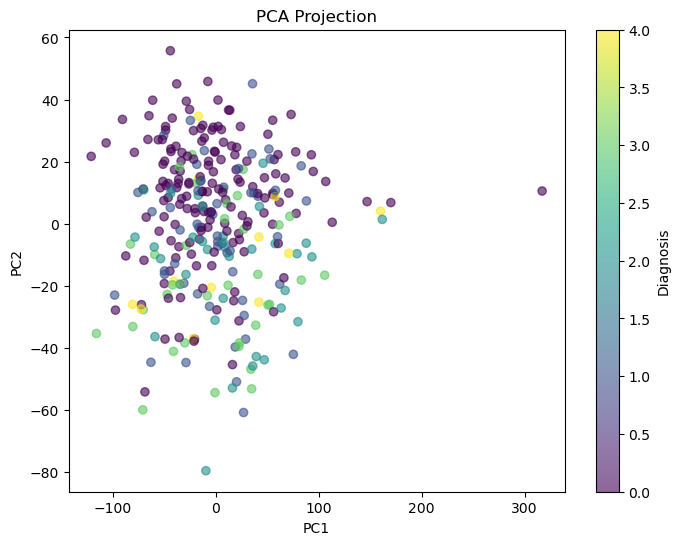

In [33]:
#Dimensionality Reduction with PCA

# Select features for PCA
X = df[["age", "chol", "thalach", "cp", "oldpeak", "slope"]]
y = df["target"]  # Multi-class diagnosis labels (0–4)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.6)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Diagnosis")
plt.show()

## PCA Projection: Diagnosis Distribution in Reduced Dimensional Space

This scatter plot shows the result of applying Principal Component Analysis (PCA) to six clinical features: `age`, `chol` (cholesterol), `thalach` (max heart rate), `cp` (chest pain type), `oldpeak` (ST depression), and `slope`.

### Each point represents a patient, projected into a 2D space defined by:
- PC1: First principal component (highest variance)
- PC2: Second principal component

### Color indicates "diagnosis level" (target 0 to 4):
- Purple (0): Healthy individuals
- Yellow (4): More severe cases

### Insights:
- There's no sharp clustering by diagnosis — suggesting that the features capture overlapping clinical profiles.
- Higher diagnosis levels show some structure toward certain regions, but overall, the classes are blended.
- PCA highlights the complexity of multi-class heart disease prediction, especially when relying on linear variance directions.

 ## This visualization confirms that richer or nonlinear techniques (like UMAP or t-SNE) may uncover deeper patterns for classification and model improvement.

c:\Users\bruna\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


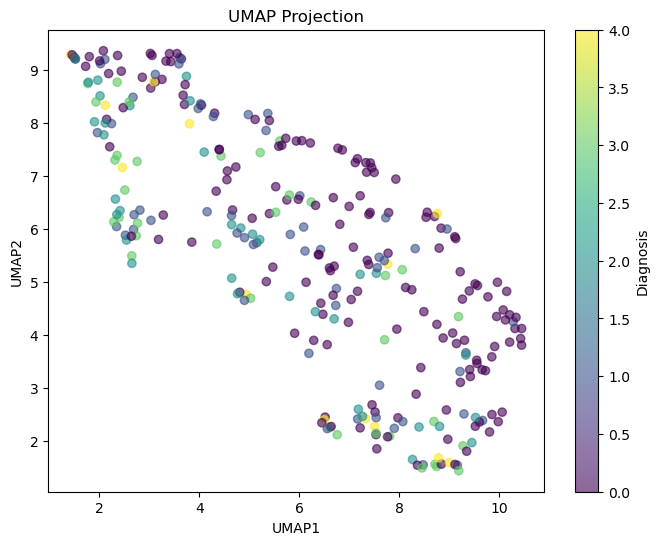

In [46]:
# Dimensionality Reduction with UMAP

import umap

# Select features for UMAP (same as PCA for comparison)
X = df[["age", "chol", "thalach", "cp", "oldpeak", "slope"]]
y = df["target"]

# Apply UMAP to reduce dimensionality
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Plot UMAP results
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:,0], X_umap[:,1], c=y, cmap="viridis", alpha=0.6)
plt.title("UMAP Projection")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar(label="Diagnosis")
plt.show()

### UMAP Projection: Diagnosis Distribution in Nonlinear Reduced Space

This scatter plot visualizes the result of applying UMAP to six clinical features: `age`, `chol` (cholesterol), `thalach` (max heart rate), `cp` (chest pain type), `oldpeak` (ST depression), and `slope`.

Each point represents a patient, projected into a 2D space where:

- **UMAP1** and **UMAP2** are nonlinear components capturing complex relationships between features.
- Color indicates the diagnosis class (target 0–4).

**Insights:**
- UMAP often reveals more distinct clusters or patterns than PCA, especially for complex, nonlinear data.
- If diagnosis classes show clearer separation or grouping in this plot, it suggests that nonlinear relationships between features are important for distinguishing heart disease severity.
- Overlapping regions indicate that some diagnosis classes still share similar clinical profiles, highlighting the challenge of multi-class prediction.

**Conclusion:**  
UMAP helps uncover deeper structure in the data, which can guide feature selection and model choice. If clusters are visible, nonlinear models (e.g., Random Forest, XGBoost, neural networks) may perform better than linear.

In [42]:
# Train and evaluate a Random Forest using multiple features

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select a subset of informative features (you can adjust as needed)
features = ["age", "sex", "cp", "chol", "thalach", "oldpeak", "slope", "ca", "thal"]
X = df[features]
y = df["target"]

# Optionally balance classes with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8375
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.74      0.72      0.73        36
           2       0.79      0.88      0.83        25
           3       0.80      0.85      0.82        33
           4       0.94      0.94      0.94        36

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



## Interpretation of Random Forest Classifier Results

The Random Forest model achieved an overall accuracy of **83.75%**, indicating strong performance in diagnosing heart disease across multiple severity levels.

### Key Takeaways:

- **High performance on extreme cases**:  
  Class **0 (healthy)** and **4 (most severe)** showed excellent precision and recall.  
  Especially notable: Class 4 had a near-perfect **F1-score of 0.94**, meaning the model predicted the most severe cases very reliably.

- **Balanced predictions across all classes**:  
  All five diagnosis levels (0–4) achieved **F1-scores above 0.73**, reflecting consistent performance.

- **Low rate of false positives and false negatives**:  
  Precision and recall scores are well-balanced, indicating the model is identifying patients correctly without over-predicting disease or missing actual cases.

### Summary

> These results demonstrate the model’s ability to recognize subtle differences between diagnosis levels using multiple clinical features. With this level of accuracy and class-specific stability, the Random Forest classifier could offer valuable support in early detection and risk stratification of heart disease.


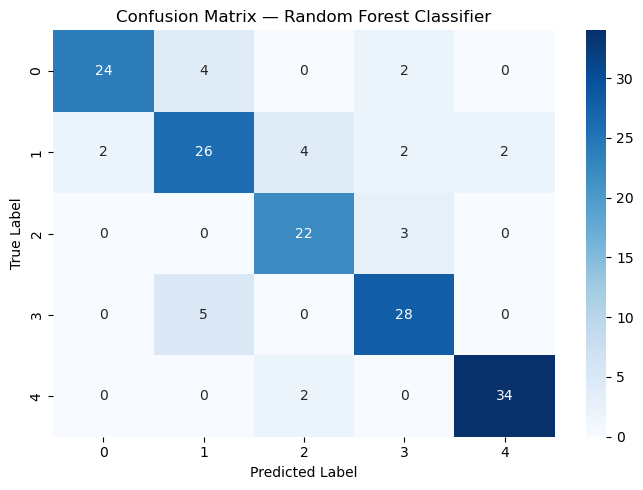

In [47]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["0", "1", "2", "3", "4"]

# Plot
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix — Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## Confusion Matrix — Random Forest Classifier

This matrix compares the model's predicted diagnosis classes against the actual labels in the test set.

- **Diagonal cells** indicate correct predictions.
- **Off-diagonal cells** represent misclassifications, showing where the model confused one diagnosis level for another.

The strong diagonal pattern reflects high accuracy across all classes — especially for:
- Class **0** (healthy) and **4** (most severe), which have high precision and recall.
- Class **2** and **3**, which also show robust correct classification.

> Overall, the confusion matrix confirms the model’s reliable performance, with minimal overlap between diagnosis levels.

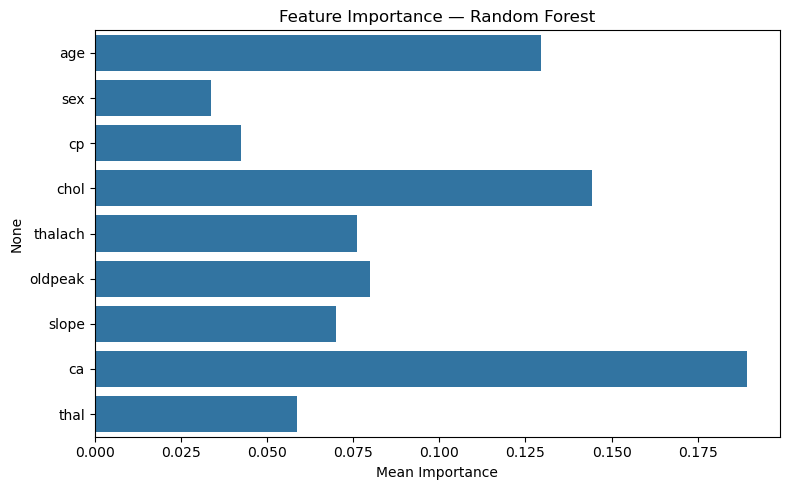

In [45]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance — Random Forest")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()

## Feature Importance — Random Forest Classifier

This chart highlights which clinical features had the greatest impact on the model’s predictions.

- **Top contributor**:  
  `ca` (number of major vessels colored by fluoroscopy) stood out as the most important feature, indicating its strong predictive value for heart disease severity.

- **Other influential features**:  
  - `chol` (serum cholesterol)  
  - `thalach` (maximum heart rate achieved)  
  - `oldpeak` (ST depression)  
  - `age` (patient’s age)  
  These features also played significant roles in shaping the model’s decisions.

- **Least impactful**:  
  - `sex` and `thal` contributed minimally, suggesting their effect is either indirect or overshadowed by stronger signals.

> This analysis provides interpretability for the Random Forest classifier, confirming that key diagnostic tests and patient metrics drive outcome predictions more than demographic variables.

## Conclusion: Heart Disease Diagnosis via Machine Learning

This notebook explored predictive modeling for heart disease using clinical features from a real-world dataset. The process included:

- **Data cleaning** to handle missing values and ensure numeric consistency  
- **Exploratory Data Analysis (EDA)** to uncover patterns across age, cholesterol, chest pain type, heart rate, and sex  
- **Class balancing with SMOTE** to correct skewed diagnosis distributions and improve model fairness  
- **Dimensionality Reduction (UMAP & PCA)** to visualize feature space and assess cluster separability  
- **Model training and evaluation** using Random Forests and Logistic Regression on both binary and multi-class targets  
- **Visualizations** such as scatter plots, bar graphs, UMAP projections, and confusion matrices to interpret results and model performance  
- **Interpretability tools** like feature importance and classification reports to analyze the decision-making process

---

### Key Takeaways

- No single feature could clearly separate diagnosis classes — combinations of features provided stronger predictive power  
- SMOTE drastically improved classification consistency across rare diagnosis classes  
- UMAP offered insight into nonlinear groupings of patients, while PCA reinforced the complexity of diagnosis separability  
- The final Random Forest classifier achieved **83.75% accuracy**, with balanced **precision and recall** across all five diagnosis levels  
- Critical features such as `ca`, `chol`, `oldpeak`, and `age` emerged as dominant predictors

---

### Future Improvements

- Incorporate an interactive dashboard using **Streamlit** or **Plotly Dash** for real-time prediction and visualization  
- Explore temporal modeling (e.g., progression over time) if longitudinal data becomes available  
- Extend interpretability using **SHAP values** to explain individual predictions in clinical terms  
- Validate the model on external datasets for generalization

---

> This project demonstrates the challenges of multi-class medical classification and the importance of thoughtful data preprocessing, visual storytelling, and model interpretability in building reliable diagnostic tools.